### The goal of this exercise is to get familiarize with different algos that performs text processing and classification to be ready to classify docket texts

### Here's an example to do Spam Classification

reference: https://www.kaggle.com/uciml/sms-spam-collection-dataset

### Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### Content

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link]. -> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link]. -> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link]. -> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

### Acknowledgements

The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

### Inspiration

Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

### Basic Necessities

In [85]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
from wordcloud import WordCloud

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import Data

In [4]:
data = pd.read_csv('spam_detector/spam.csv', encoding = 'latin-1')

In [6]:
print(data.shape)
data.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
#Drop column and name change
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})

In [8]:
print(data.shape)
data.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

In [11]:
print(data.shape)
data.head()

(5572, 3)


,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.2, random_state = 10)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


### Text Transformation
#### Without treatments

In [16]:
vect = CountVectorizer() #Convert a collection of text documents to a matrix of token counts
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [69]:
print(len(vect.get_feature_names()))
vect.get_feature_names() #a whole lot of junk in there

7757


['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '0796xxxxxx',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [19]:
print('junk central from the top: {}'.format(vect.get_feature_names()[0:20]))
print('junk central from the bottom: {}'.format(vect.get_feature_names()[-20:]))

junk central from the top: ['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
junk central from the bottom: ['zyada', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


In [71]:
print('some stop words: {}'.format(vect.get_stop_words()))

some stop words: None


In [21]:
#transform the train and test data into vectors, according to countvectorizer results
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

 ### Visualisations

In [24]:
spam = data[data.label_num == 1]
ham = data[data.label_num == 0]

In [78]:
%%time
ham_words = ''
spam_words = ''

lmtzr = WordNetLemmatizer()

for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in stopwords.words('english')] #could be ignored. try it out for result
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in stopwords.words('english')] #could be ignored. try it out for result
    for words in tokens:
        ham_words = ham_words + words + ' '

In [27]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width = 600, height = 400).generate(spam_words)
ham_wordcloud = WordCloud(width = 600, height = 400).generate(ham_words)

In [87]:
Counter(spam_words.split()).most_common(10)

[('.', 912),
 ('!', 542),
 (',', 371),
 ('call', 358),
 ('free', 217),
 ('&', 178),
 ('2', 174),
 ('?', 174),
 (':', 163),
 ('txt', 156)]

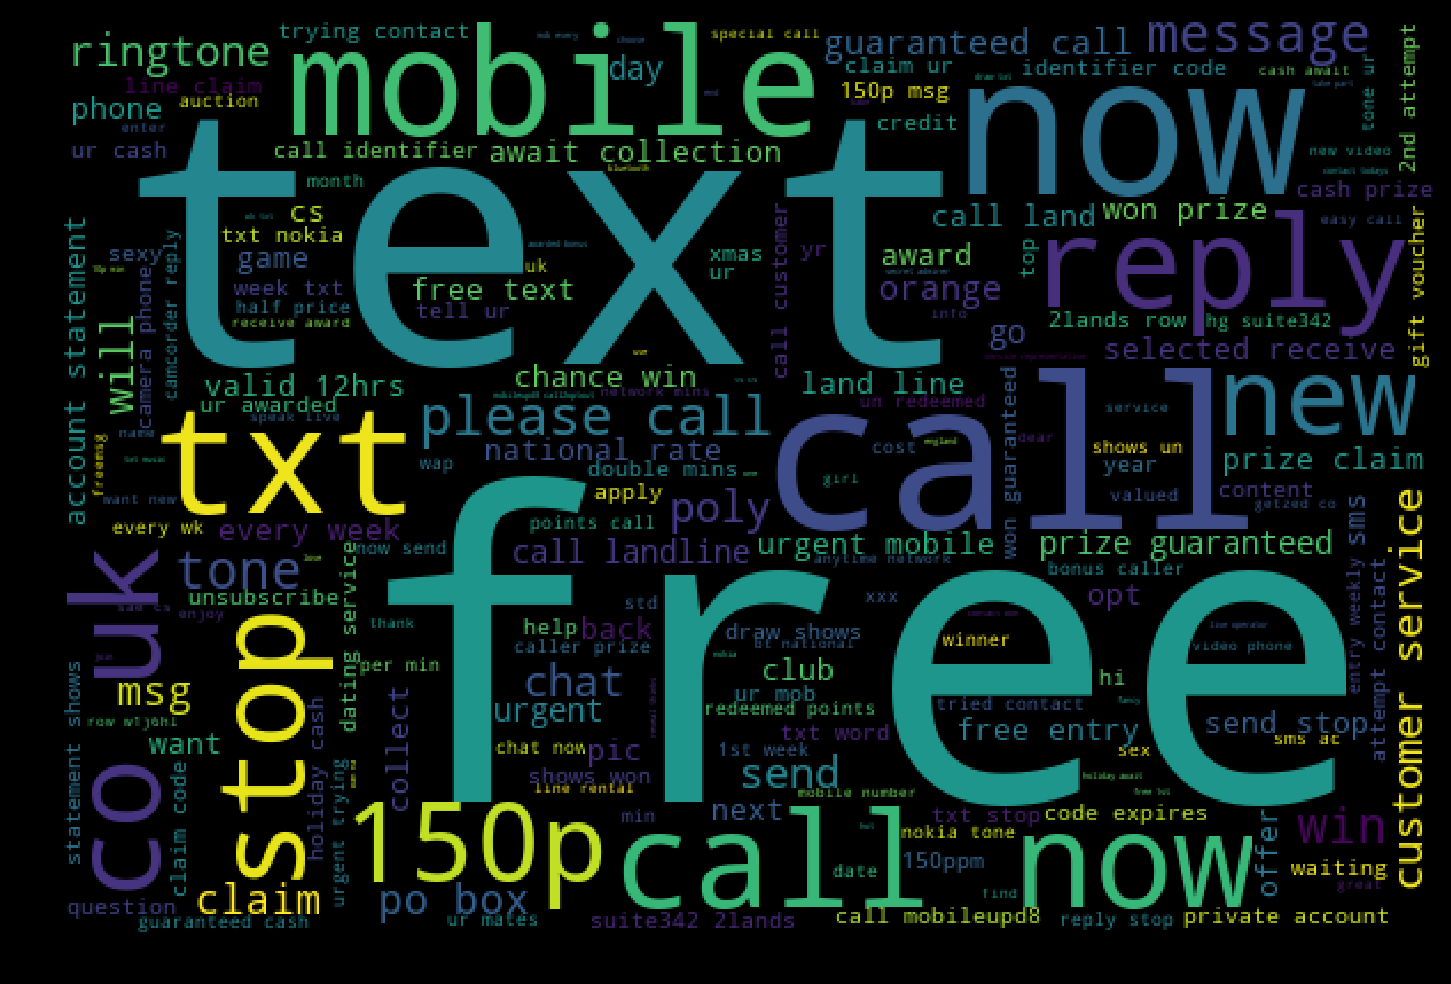

In [83]:
#Spam Word cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [88]:
Counter(ham_words.split()).most_common(10)

[('.', 3815),
 (',', 1500),
 ('?', 1367),
 ('...', 1223),
 ('u', 1019),
 ('!', 839),
 (';', 762),
 ('&', 738),
 (':', 554),
 (')', 429)]

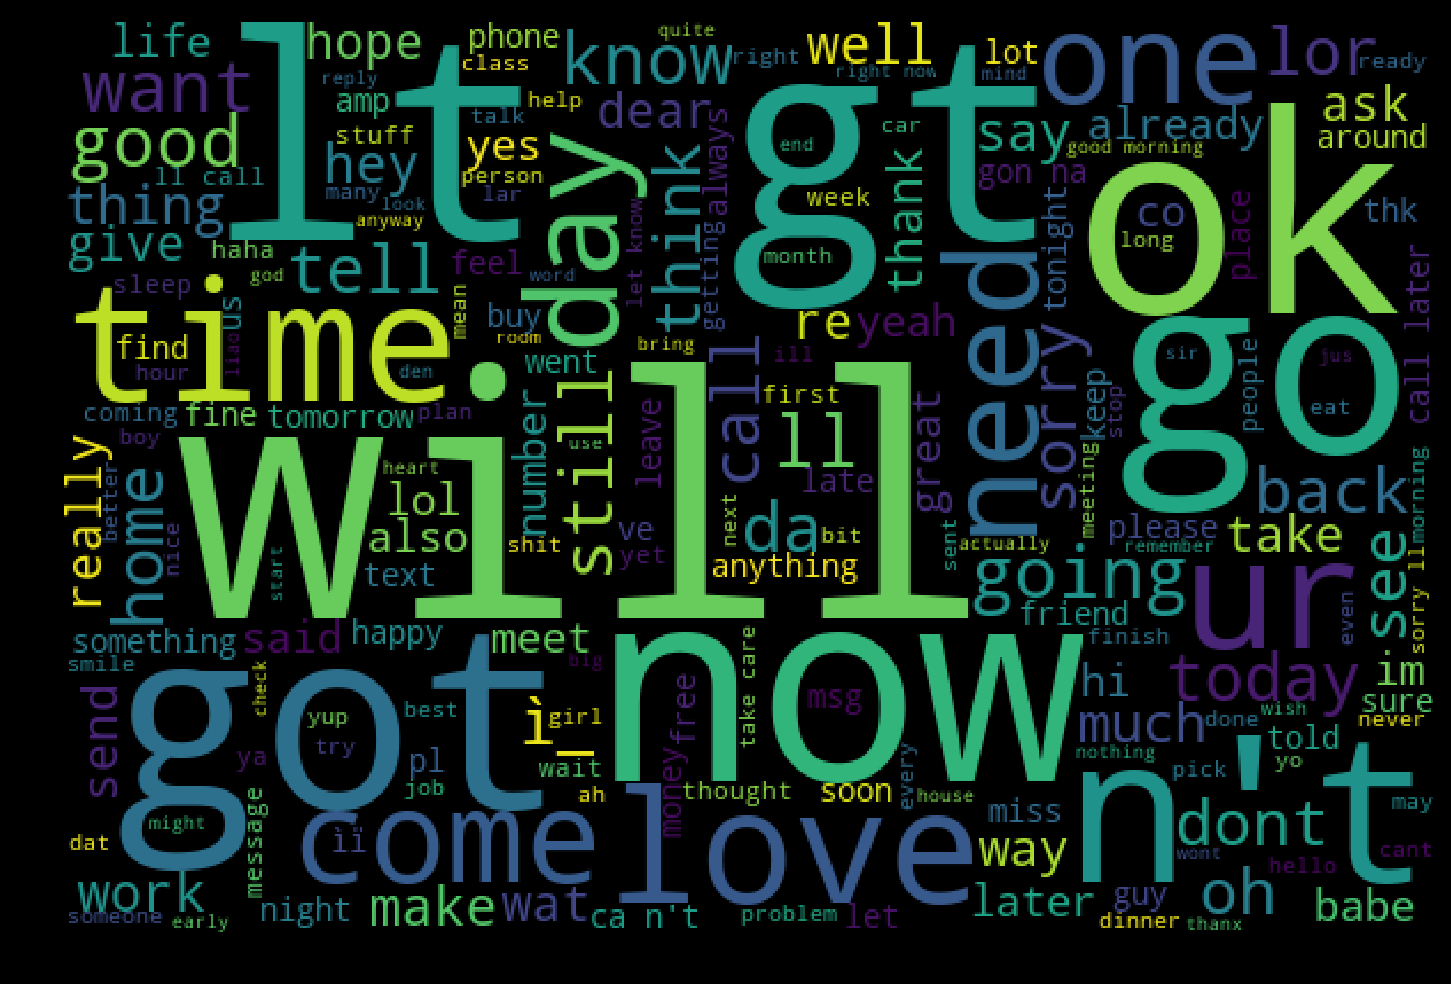

In [84]:
#Ham word cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### Machine Learning models

#### Multinomial Naive Bayes, Default Hyperparameters

In [91]:
prediction = dict()
MNB = MultinomialNB()
MNB.fit(X_train_df, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
prediction['Multinomial'] = MNB.predict(X_test_df)

In [93]:
accuracy_score(y_test, prediction['Multinomial'])

0.9883408071748879

In [95]:
prediction['Multinomial']

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Logistic Regression

In [96]:
LR = LogisticRegression()
LR.fit(X_train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
prediction['Logistic'] = LR.predict(X_test_df)

In [98]:
accuracy_score(y_test, prediction['Logistic'])

0.9802690582959641

### KNN classifier

In [99]:
KNNC = KNeighborsClassifier(n_neighbors = 5)
KNNC.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
prediction['knn'] = KNNC.predict(X_test_df)

In [101]:
accuracy_score(y_test, prediction['knn'])

0.9121076233183857

### Ensemble classifier

In [102]:
RFC = RandomForestClassifier()
RFC.fit(X_train_df, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [103]:
prediction['random_forest'] = RFC.predict(X_test_df)

In [104]:
accuracy_score(y_test, prediction['random_forest'])

0.9659192825112107

In [105]:
ABC = AdaBoostClassifier()
ABC.fit(X_train_df, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [106]:
prediction['adaboost'] = ABC.predict(X_test_df)

In [107]:
accuracy_score(y_test, prediction['adaboost'])

0.967713004484305

### Parameter Tuning using GridSearchCV

In [108]:
k_range = range(1, 30)
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': range(1, 30)}


In [109]:
KNC = KNeighborsClassifier()
grid = GridSearchCV(KNC, param_grid)
grid.fit(X_train_df, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 30)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [110]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [111]:
grid.best_params_

{'n_neighbors': 1}

In [112]:
grid.best_score_

0.9461521202602647

In [113]:
grid.grid_scores_

[mean: 0.94615, std: 0.00449, params: {'n_neighbors': 1},
 mean: 0.92259, std: 0.00288, params: {'n_neighbors': 2},
 mean: 0.92349, std: 0.00226, params: {'n_neighbors': 3},
 mean: 0.90554, std: 0.00117, params: {'n_neighbors': 4},
 mean: 0.90621, std: 0.00065, params: {'n_neighbors': 5},
 mean: 0.89410, std: 0.00060, params: {'n_neighbors': 6},
 mean: 0.89455, std: 0.00062, params: {'n_neighbors': 7},
 mean: 0.88580, std: 0.00141, params: {'n_neighbors': 8},
 mean: 0.88602, std: 0.00142, params: {'n_neighbors': 9},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 10},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 11},
 mean: 0.87660, std: 0.00210, params: {'n_neighbors': 12},
 mean: 0.87705, std: 0.00230, params: {'n_neighbors': 13},
 mean: 0.87256, std: 0.00223, params: {'n_neighbors': 14},
 mean: 0.87278, std: 0.00253, params: {'n_neighbors': 15},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 16},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 17},
 mean:

### Model Evaluation

In [114]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ['Ham', 'Spam']))

             precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       965
       Spam       0.97      0.95      0.96       150

avg / total       0.99      0.99      0.99      1115



In [115]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis = 1)[:, np.newaxis]

Text(0.5,16,'Predicted label')

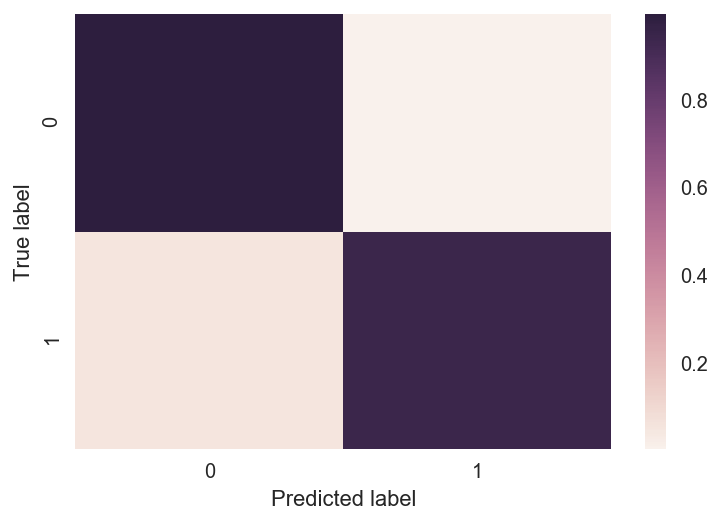

In [116]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Future works

In [117]:
print(conf_mat)

[[960   5]
 [  8 142]]


In [118]:
pd.set_option('display.max_colwidth', -1)

#### Misclassified as Spam

In [119]:
X_test[y_test < prediction['Multinomial']]

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: text, dtype: object

#### Misclassfied as Ham

In [120]:
X_test[y_test > prediction['Multinomial']]

5035    You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt       
2574    Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.   
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
68      Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"                                                                            
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                          
4211    Missed call alert. These numbers called but left no message. 07008009200                                                                                    
3572    Yo